# <center>Bill Authenticity Prediction Using K Nearest Neighbor</center>

## Introduction 
In various financial transactions, the authenticity of bills is of utmost importance. Counterfeit bills can lead to significant financial losses and undermine trust in the monetary system. To address this issue, the Bill Authenticity Prediction project provides a solution to automate the process of determining whether a bill is genuine or fake based on its physical attributes.

This project leverages the power of machine learning and specifically employs the K Nearest Neighbors algorithm for classification. By analyzing the attributes of bills, including diagonal length, height_left, height_right, margin_low, margin_up, and length, the project predicts whether a bill is genuine or not.

## Step 1: Importing the Data and Relevant Libraries
The first step in the data analysis process is to import the dataset and the necessary libraries. For this project, the dataset is in CSV format, and we will use Python's pandas library to load the data into a dataframe for analysis.

In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# for notebook use
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()
import plotly.express as px

In [2]:
#Importing the data 
df=pd.read_csv('fake_bills.csv')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


## Step 2: Exploratory Data Analysis & Cleaning

In this step, we will perform exploratory data analysis to gain insights into our dataset and identify any quality issues that may need to be addressed. The exploratory data analysis process involves examining the data, understanding its characteristics, and visualizing relationships between variables.

To start, we will explore the following aspects of our dataset:

1. **Data Quality Check:** We will assess the overall quality of the data, looking for missing values, outliers, or any inconsistencies in the data entries. Addressing these issues is crucial to ensure the reliability of our analysis.

2. **Univariate Analysis:** We will examine individual variables in our dataset to understand their distributions, identify any outliers, and uncover patterns or insights that can guide our further analysis.

3. **Bivariate Analysis:** We will analyze the relationships between pairs of variables to uncover any associations or correlations. This will help us identify potential predictors or variables that may have an impact on the outcome we are trying to predict.

4. **Multivariate Analysis:** By considering multiple variables simultaneously, we can explore complex relationships and interactions. We will use techniques such as scatter plots, heatmaps, or parallel coordinate plots to visualize these relationships.

The main goal of the exploratory data analysis is to gain a deep understanding of our dataset and prepare it for subsequent modeling or analysis steps. Through this process, we can identify any data quality issues, discover patterns, and generate hypotheses that will guide our decision-making in the later stages of the project.

By performing a thorough exploratory data analysis, we ensure that our data is suitable for modeling and enable us to make more informed decisions throughout the project.


## 2a. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
#Checking for duplicates
df.duplicated().sum()

0

In [5]:
#Checking for nulls 
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [6]:
# Fixing nulls 
df['margin_low'].fillna(df['margin_low'].mean(),inplace=True)

In [7]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### 2b. Exploratory Data Analysis

We will commence our Exploratory Data Analysis (EDA) by generating univariate plots to examine the distribution of variables within our dataset.

Text(0.5, 1.0, 'Count of Classes')

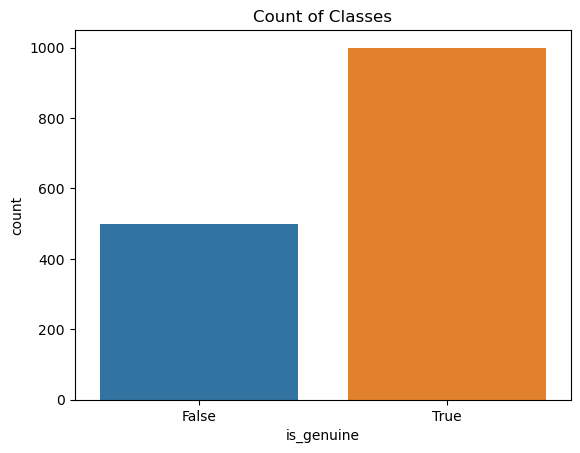

In [8]:
sns.countplot(x=df['is_genuine']).set_title('Count of Classes')


In [9]:
def distr(data,title,xlabel,ylabel):
    data.iplot(kind='hist',title=title,xTitle=xlabel,yTitle=ylabel)
distr(data=df['diagonal'],title='Distribution of diagonal',xlabel='diagonal',ylabel='Count')

In [10]:
distr(df['height_left'],title='Distribution of height_left',xlabel='height_left',ylabel='Count')

In [11]:
distr(df['height_right'],title='Distribution of height_right',xlabel='height_right',ylabel='Count')

In [12]:
distr(df['margin_low'],title='Distribution of margin_low',xlabel='margin_low',ylabel='Count')

In [13]:
distr(df['margin_up'],title='Distribution of margin_up',xlabel='margin_up',ylabel='Count')

In [14]:
distr(df['length'],title='Distribution of Length',xlabel='Length',ylabel='Count')

For the bivariate analysis, we will create plots to visualize the distribution of the bill attributes, taking into account their authenticity status, as depicted below

Text(0.5, 1.0, 'Distribution of Height_Left by authenticity')

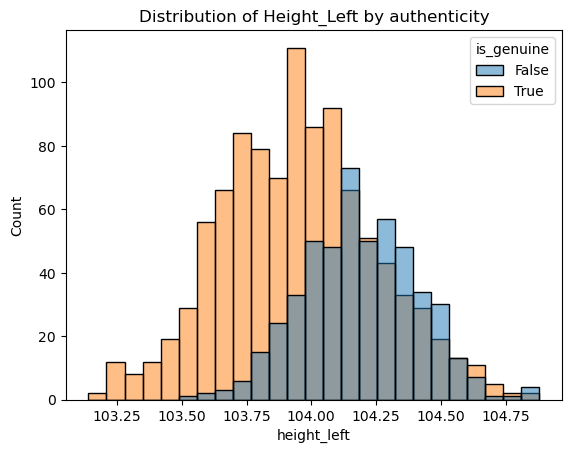

In [15]:
sns.histplot(data=df,x='height_left',hue='is_genuine').set_title('Distribution of Height_Left by authenticity')

Text(0.5, 1.0, 'Distribution of Height_right by authenticity')

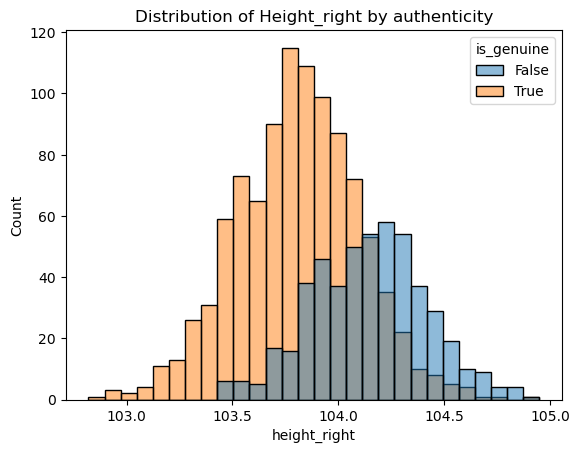

In [16]:
sns.histplot(data=df,x='height_right',hue='is_genuine').set_title('Distribution of Height_right by authenticity')

Text(0.5, 1.0, 'Distribution of Margin_Low by authenticity')

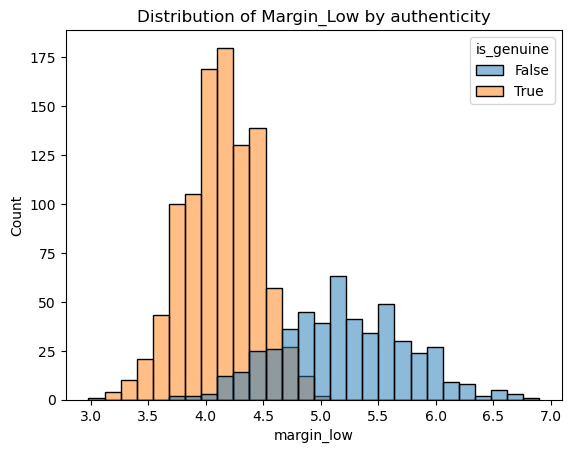

In [17]:
sns.histplot(data=df,x='margin_low',hue='is_genuine').set_title('Distribution of Margin_Low by authenticity')

Text(0.5, 1.0, 'Distribution of Margin_up by authenticity')

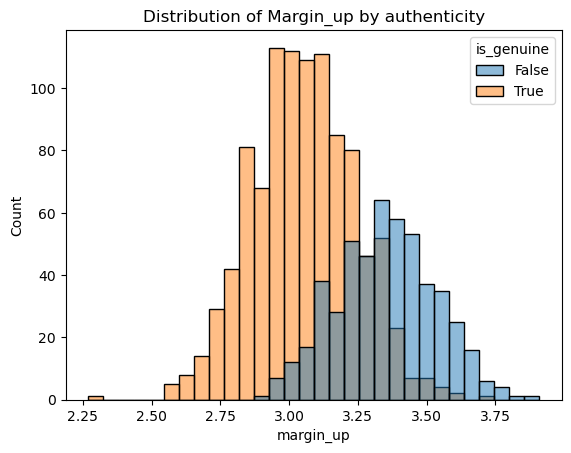

In [18]:
sns.histplot(data=df,x='margin_up',hue='is_genuine').set_title('Distribution of Margin_up by authenticity')

Text(0.5, 1.0, 'Distribution of Length by authenticity')

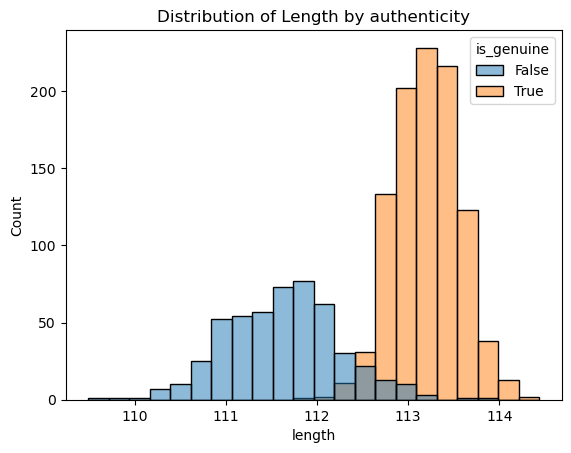

In [19]:
sns.histplot(data=df,x='length',hue='is_genuine').set_title('Distribution of Length by authenticity')

For the purpose of multivariate analysis, we will generate a heatmap to visualize the correlation among our predictor variables as follows

In [20]:
# Obtaining the correlation matrix 
df.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.775015,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.110244,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.299028,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.384513,0.307005,-0.401751
margin_low,-0.775015,-0.110244,0.299028,0.384513,1.000000,0.425608,-0.658844
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.425608,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.658844,-0.520575,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

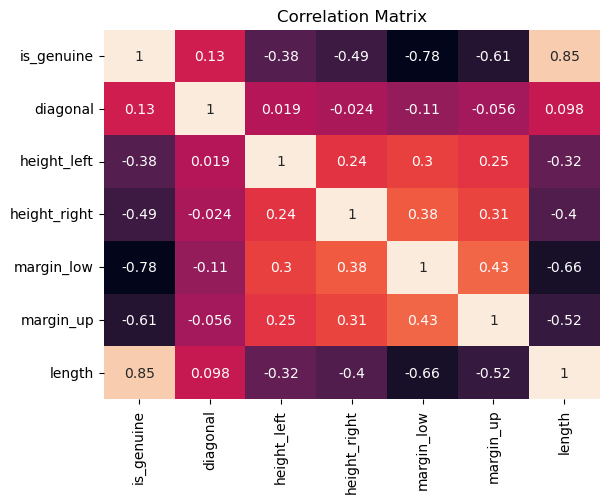

In [21]:
#Plotting the heatmap
sns.heatmap(df.corr(),annot=True,cbar=False).set_title('Correlation Matrix')

## Step 3: Building our Model

Now that we have cleaned and explored the relationship in our data, we will proceed to build a model for predicting the authenticity of a bill using the K-Nearest Neighbors (KNN) algorithm. We will accomplish this by following the steps outlined below:

1. **Encoding the dependent variable:** We will encode our dependent variable into two binary classes, with 1 representing authentic bills and 0 representing fake bills.

2. **Defining the predictor variables:** Our predictor variables will include diagonal, height_left, height_right, margin_low, margin_up, and length. The dependent variable will be is_genuine.

3. **Standardizing the predictor variables:** To ensure that all variables have the same scale, we will standardize our predictor variables.

4. **Splitting the data:** We will split our data into training and test sets, with the training data comprising 70% of the overall data.

5. **Fitting the model:** We will fit our KNN model to the training data.

6. **Training and obtaining predictions:** Using the trained model, we will make predictions based on the test set.

7. **Evaluating the model's performance:** We will evaluate the performance of our model by generating a classification report, which will provide metrics such as precision, recall, and F1-score.

8. **Optimizing model parameters:** To improve the performance of our model, we will search for the best value of K, the number of nearest neighbors considered for classification.


In [22]:
# Encoding the dependent variable
df=pd.get_dummies(data=df,columns=['is_genuine'],drop_first=True)

In [23]:
# Defining our dependent and independent variables 
x=df[df.columns[0:-1]]
y=df[df.columns[-1]]

In [24]:
# Standardizing x variables 
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_std=scalar.fit(x).transform(x)

In [25]:
# Dividing our Data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_std,y,train_size=0.70)


In [26]:
# fitting our model to the data
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X=x_train,y=y_train)


KNeighborsClassifier()

In [27]:
# Obtaining predictions from the model 
pred=knn_model.predict(x_test)

In [28]:
# Evaluating our model performance 
from sklearn.metrics import classification_report
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       144
           1       0.99      1.00      0.99       306

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.99       450
weighted avg       0.99      0.99      0.99       450



## Model Findings

Based on the classification report of the model, here are the findings:

- **Precision:** The precision measures the accuracy of the positive predictions made by the model. For class 0 (representing fake bills), the precision is 0.98, indicating that out of all the instances predicted as fake bills, 98% were actually fake. For class 1 (representing authentic bills), the precision is also 0.99, indicating that out of all the instances predicted as authentic bills, 99% were actually authentic.

- **Recall:** The recall measures the ability of the model to correctly identify the positive instances in the dataset. For class 0 (fake bills), the recall is 0.98, indicating that the model correctly identified 98% of the actual fake bills. For class 1 (authentic bills), the recall is 1.00, indicating that the model correctly identified all the actual authentic bills.

- **F1-Score:** The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. For both class 0 and class 1, the F1-scores are 0.99, indicating high accuracy and balance between precision and recall.

- **Support:** The support indicates the number of instances in each class. In this case, there are 144 instances of class 0 (fake bills) and 306 instances of class 1 (authentic bills) in the test set.

- **Accuracy:** The overall accuracy of the model on the test set is 0.99, meaning that it correctly predicted the authenticity of bills with 99% accuracy.

- **NB:** These values might vary when you run the model since the test and train data is randomly selected

In [29]:
# Optimizing our model by finding the best value of K i.e minimizing the error term
error_rate=[]
for i in np.arange(1,40,1):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred=knn_model.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

Text(0.5, 1.0, 'Mean Error rate vs K values')

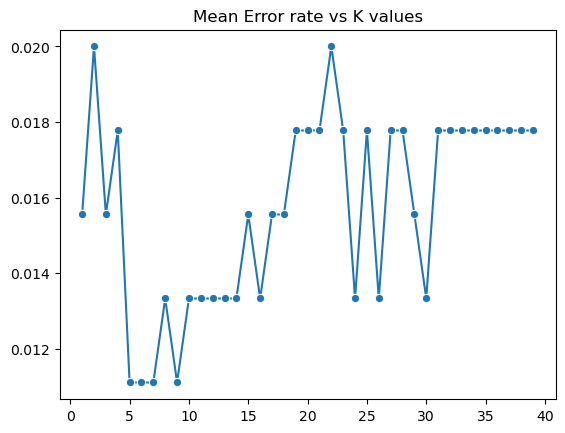

In [30]:
sns.lineplot(x=np.arange(1,40,1),y=error_rate,marker='o').set_title('Mean Error rate vs K values')

## Project Summary

In this project, we successfully developed a model using the K-Nearest Neighbors (KNN) algorithm to predict the authenticity of bills. The model demonstrated high precision, recall, and F1-scores for both fake and authentic bill classes. It achieved an overall accuracy of 0.99 on the test set, indicating its effectiveness in distinguishing between fake and authentic bills. This project contributes to the field of fraud detection and prevention in financial transactions and highlights the potential of machine learning techniques in addressing such challenges.
